<h4><b>Softmax Activation Function for Regression and multiclass Classification Tasks</b></h4>

    A[n] = np.exp(z[n]) / (np.exp(z[1]) + np.exp(z[2]) + ... + np.exp(z[n])) = P(y=n|X)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import sigmoid, relu, linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.datasets import make_blobs

In [3]:
def soft_max(Z):
    eZ = np.exp(Z)
    A = eZ / np.sum(eZ)
    return A

In [4]:
z = np.array([[2, 3, 4, 5, 6, 7, 8], [4, 5, 6, 7, 8, 5, 2]])
a = soft_max(z)
y = np.array([[3, 3, 4, 6, 5, 5, 8], [4, 4, 6, 7, 8, 5, 2]])
print(z)
print(a)
print(np.sum(a)) # sum to 1

[[2 3 4 5 6 7 8]
 [4 5 6 7 8 5 2]]
[[0.00077361 0.0021029  0.00571628 0.01553847 0.04223793 0.1148146
  0.31209843]
 [0.00571628 0.01553847 0.04223793 0.1148146  0.31209843 0.01553847
  0.00077361]]
0.9999999999999998


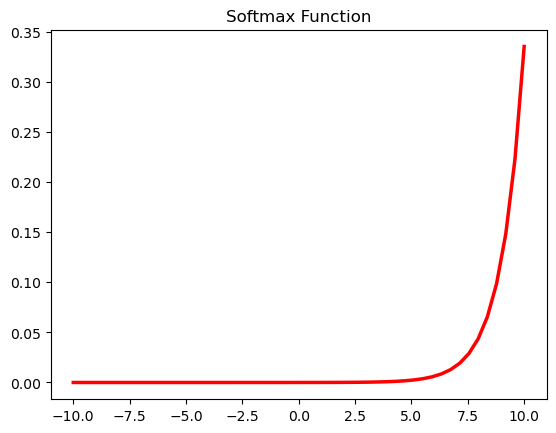

In [5]:
plt.plot(np.linspace(-10, 10, 50), soft_max(np.linspace(-10, 10, 50)), color="red", linewidth=2.5)
plt.title("Softmax Function")
plt.show()

<p>Categorical Cross Entropy Function (compute the cost in a multiclass classification algorithm)</p>

In [6]:
def softmax_loss(y_pred, y_true):
    """
    Compute the softmax loss for multiclass classification.

    Parameters:
    - y_pred: Predicted probabilities for each class (numpy array of shape (N, C))
    - y_true: True class labels (numpy array of shape (N,))

    Returns:
    - loss: Softmax loss
    """
    # Number of samples
    N = len(y_true)

    # Ensure that y_pred is not too close to 0 or 1 to avoid numerical instability
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # One-hot encode the true class labels
    y_true_one_hot = np.eye(y_pred.shape[1])[y_true]

    # Compute the softmax loss
    loss = -np.sum(y_true_one_hot * np.log(y_pred)) / N

    return loss

In [7]:

centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000,
                              centers=centers, cluster_std=1.0,random_state=30)

print(X_train[:20])
print(y_train[:20])

[[ 1.55508243  0.84801682]
 [-5.33749882  1.03397255]
 [-4.09353183  0.67843096]
 [-1.35928349 -1.49568732]
 [-0.67987836  3.15016353]
 [ 1.4685845   1.60076541]
 [-1.06017154 -2.23889878]
 [-6.05801535  2.46838122]
 [-1.59902629 -1.70935056]
 [ 4.27160051 -1.70297395]
 [-0.1534505  -0.87009366]
 [ 1.88130159  2.17140809]
 [-4.77149121  3.93340251]
 [ 1.17548648  3.36341941]
 [ 1.86700426  1.28290304]
 [-5.6272356   1.5400402 ]
 [-2.32739448 -3.40165959]
 [ 0.80333605  0.73158863]
 [ 3.77042178 -3.04486441]
 [-6.54875994  2.85549542]]
[2 0 0 1 2 2 1 0 1 3 1 2 0 2 2 0 1 2 3 0]


In [ ]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')   
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)      

Epoch 1/10


2024-02-03 20:49:02.994718: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 20:49:03.036280: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-03 20:49:03.036568: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [ ]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

In [ ]:
"""
more stable and accurate results can be obtained 
if the softmax and loss are combined during training.
"""

preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')  
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)

In [ ]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

In [ ]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

In [ ]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")